<a href="https://colab.research.google.com/github/Bhanuteja01-kolli/Zomato_Restaurant_analysis/blob/main/Zomato_Project_Bangalore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
''' Evaluation Criteria (100 Points)
1. Problem Statement & Basic Metrics (10 Points)'''

import pandas as pd
df = pd.read_csv(
    "/content/zomato.csv",
    engine="python",
    on_bad_lines="skip"
)
# 2)	Total number of restaurants
shape=df.shape[0]
print(shape)
# 3)	Distribution by Delivery vs Dine-out
df['listed_in(type)'].value_counts().head(2)

188


,count
listed_in(type),
Delivery,157
Cafes,24


In [ ]:
'''2. Data Overview & Quality Check (10 Points)'''
# •	Shape of the dataset (rows & columns)
shape=df.shape
print(shape)
# •	Data types of all columns
dtypes=df.dtypes
print(dtypes)
# •	Conversion of categorical columns to category
cat_cols = ['online_order', 'book_table', 'location', 'listed_in(type)']
df[cat_cols] = df[cat_cols].astype('category')
# •	Missing value detection
miss_det=df.isnull().sum()
print(miss_det)
# •	Statistical summary of numerical columns
stat=df.describe()
print(stat)
df[cat_cols].dtypes



(188, 17)
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object
url                              0
address                          0
name                             0
online_order                     0
book_table                       0
rate                            25
votes                            0
phone                            1
location                         0
rest_type      

,0
online_order,category
book_table,category
location,category
listed_in(type),category


In [ ]:
''' 3. Non-Graphical Analysis (10 Points)
•	Value counts of:'''
# •	Online ordering
online_orders=df['online_order'].nunique()
print(online_orders)
#  • Table Booking
table_booking=df['book_table'].value_counts()
print(table_booking)
# •	Restaurant types
res_types=df['rest_type'].value_counts()
print(res_types)
#•	Locations
location=df['location'].value_counts()
print(location)
# •	Number of unique cuisines and locations
uni_cusines=df['cuisines'].nunique()
uni_locations=df['location'].nunique()
print(uni_cusines)
print(uni_locations)



2
book_table
No     177
Yes     11
Name: count, dtype: int64
rest_type
Quick Bites                   76
Casual Dining                 26
Cafe                          22
Takeaway, Delivery            13
Dessert Parlor                10
Delivery                       9
Bakery                         6
Beverage Shop                  5
Casual Dining, Cafe            3
Bar                            3
Mess                           2
Cafe, Casual Dining            2
Sweet Shop                     2
Quick Bites, Cafe              1
Bakery, Dessert Parlor         1
Pub                            1
Cafe, Quick Bites              1
Fine Dining                    1
Beverage Shop, Quick Bites     1
Confectionery                  1
Quick Bites, Beverage Shop     1
Dessert Parlor, Sweet Shop     1
Name: count, dtype: int64
location
Banashankari            140
Basavanagudi             20
Jayanagar                12
Kumaraswamy Layout       11
Mysore Road               2
Vijay Nagar               2


In [ ]:
''' 4. Visual Analysis (After Pre-processing)
Pre-processing Includes:'''
# •	Cleaning rating column (4.2/5 → 4.2)  for cleaning
df['rate']=df['rate'].str.replace('/5','')
df['rate']=df['rate'].str.replace('NEW','0')
df['rate']=df['rate'].str.replace('-','0')
df['rate']=df['rate'].astype(float)

In [ ]:
df


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,https://www.zomato.com/bangalore/chilli-flakes...,"Opposite BNM School, Near BDA complex, Banasha...",Chilli Flakes,Yes,No,3.6,46,+91 9880888509,Banashankari,Quick Bites,NaN,"Fast Food, Italian, Beverages",500,"[('Rated 2.0', ""RATED\n This was Zomato Deliv...",[],Delivery,Banashankari
184,https://www.zomato.com/bangalore/calcutta-cafe...,"728/1, 14th Main Road, 1st Stage, Kumaraswamy ...",Calcutta Cafe,Yes,No,3.5,45,+91 7207304915,Kumaraswamy Layout,Quick Bites,NaN,"Bengali, Chinese, Sandwich",350,"[('Rated 1.0', ""RATED\n They r pakka loffers ...",[],Delivery,Banashankari
185,https://www.zomato.com/bangalore/old-mumbai-ic...,"416, 24th Cross, 9th Main, 2nd Stage, Banashan...",Old Mumbai Ice Cream,Yes,No,3.9,38,080 49652445,Banashankari,Dessert Parlor,Friendly Staff,Ice Cream,150,"[('Rated 3.0', ""RATED\n My love for ice cream...",[],Delivery,Banashankari
186,https://www.zomato.com/bangalore/donne-biriyan...,"4009, 80 Feet Road, 4th Phase, Banashankari, B...",Donne Biriyani House,Yes,No,3.9,441,+91 8197743537\r\n080 26690642,Banashankari,Quick Bites,Biryani,"South Indian, North Indian, Chinese, Biryani",400,"[('Rated 5.0', ""RATED\n Biriyani is yummm her...",[],Delivery,Banashankari


In [ ]:
df.dtypes

,0
url,object
address,object
name,object
online_order,category
book_table,category
rate,float64
votes,int64
phone,object
location,category
rest_type,object


In [ ]:
# •	Converting cost column to numeric
df['approx_cost(for two people)']=df['approx_cost(for two people)'].str.replace(',','')
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)

In [ ]:
df.dtypes

,0
url,object
address,object
name,object
online_order,category
book_table,category
rate,float64
votes,int64
phone,object
location,category
rest_type,object


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
'''•	Unnesting columns: '''
# •	cuisines

df['cusines']=df['cuisines'].str.split(',')

df_explode=df.explode('cuisines')


In [ ]:
df


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,https://www.zomato.com/bangalore/chilli-flakes...,"Opposite BNM School, Near BDA complex, Banasha...",Chilli Flakes,Yes,No,3.6,46,+91 9880888509,Banashankari,Quick Bites,NaN,"Fast Food, Italian, Beverages",500.0,"[('Rated 2.0', ""RATED\n This was Zomato Deliv...",[],Delivery,Banashankari
184,https://www.zomato.com/bangalore/calcutta-cafe...,"728/1, 14th Main Road, 1st Stage, Kumaraswamy ...",Calcutta Cafe,Yes,No,3.5,45,+91 7207304915,Kumaraswamy Layout,Quick Bites,NaN,"Bengali, Chinese, Sandwich",350.0,"[('Rated 1.0', ""RATED\n They r pakka loffers ...",[],Delivery,Banashankari
185,https://www.zomato.com/bangalore/old-mumbai-ic...,"416, 24th Cross, 9th Main, 2nd Stage, Banashan...",Old Mumbai Ice Cream,Yes,No,3.9,38,080 49652445,Banashankari,Dessert Parlor,Friendly Staff,Ice Cream,150.0,"[('Rated 3.0', ""RATED\n My love for ice cream...",[],Delivery,Banashankari
186,https://www.zomato.com/bangalore/donne-biriyan...,"4009, 80 Feet Road, 4th Phase, Banashankari, B...",Donne Biriyani House,Yes,No,3.9,441,+91 8197743537\r\n080 26690642,Banashankari,Quick Bites,Biryani,"South Indian, North Indian, Chinese, Biryani",400.0,"[('Rated 5.0', ""RATED\n Biriyani is yummm her...",[],Delivery,Banashankari


In [ ]:
# •	location
df['location']=df['location'].astype(str)
df['location']=df['location'].str.split(',')

df_explode_loc=df.explode('location')

In [ ]:
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,[Banashankari],Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,[Banashankari],Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,[Banashankari],"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,[Banashankari],Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,[Basavanagudi],Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,https://www.zomato.com/bangalore/chilli-flakes...,"Opposite BNM School, Near BDA complex, Banasha...",Chilli Flakes,Yes,No,3.6,46,+91 9880888509,[Banashankari],Quick Bites,NaN,"Fast Food, Italian, Beverages",500.0,"[('Rated 2.0', ""RATED\n This was Zomato Deliv...",[],Delivery,Banashankari
184,https://www.zomato.com/bangalore/calcutta-cafe...,"728/1, 14th Main Road, 1st Stage, Kumaraswamy ...",Calcutta Cafe,Yes,No,3.5,45,+91 7207304915,[Kumaraswamy Layout],Quick Bites,NaN,"Bengali, Chinese, Sandwich",350.0,"[('Rated 1.0', ""RATED\n They r pakka loffers ...",[],Delivery,Banashankari
185,https://www.zomato.com/bangalore/old-mumbai-ic...,"416, 24th Cross, 9th Main, 2nd Stage, Banashan...",Old Mumbai Ice Cream,Yes,No,3.9,38,080 49652445,[Banashankari],Dessert Parlor,Friendly Staff,Ice Cream,150.0,"[('Rated 3.0', ""RATED\n My love for ice cream...",[],Delivery,Banashankari
186,https://www.zomato.com/bangalore/donne-biriyan...,"4009, 80 Feet Road, 4th Phase, Banashankari, B...",Donne Biriyani House,Yes,No,3.9,441,+91 8197743537\r\n080 26690642,[Banashankari],Quick Bites,Biryani,"South Indian, North Indian, Chinese, Biryani",400.0,"[('Rated 5.0', ""RATED\n Biriyani is yummm her...",[],Delivery,Banashankari


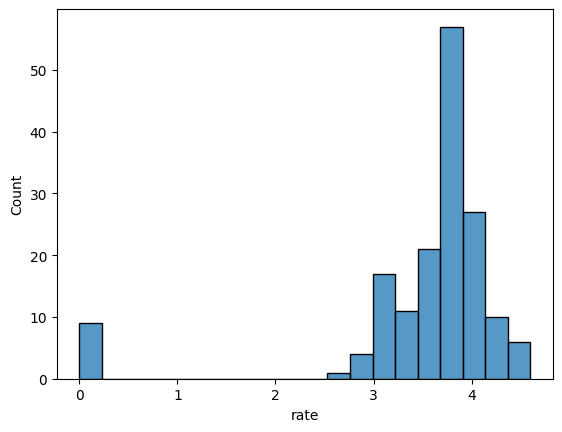

In [ ]:
'''4.1 Univariate Analysis – Continuous Variables
 Pre-processing Includes:
 •	Histogram / Distplot for:'''
import seaborn as sns
import matplotlib.pyplot as plt

# •	Ratings
sns.histplot(df['rate'],bins=20)
plt.show()





<Axes: xlabel='approx_cost(for two people)', ylabel='Count'>

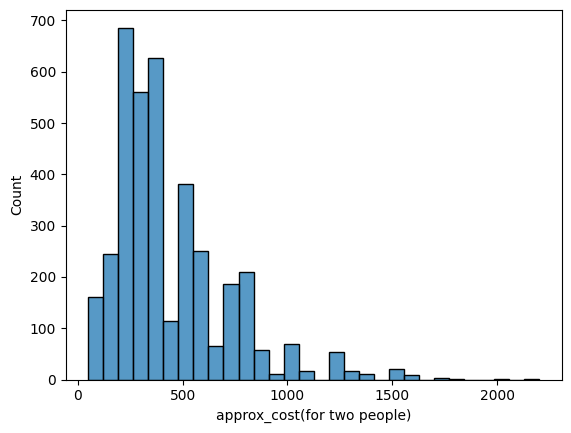

In [ ]:
# •	Cost for two
sns.histplot(df['approx_cost(for two people)'],bins=30)

<Axes: xlabel='votes', ylabel='Count'>

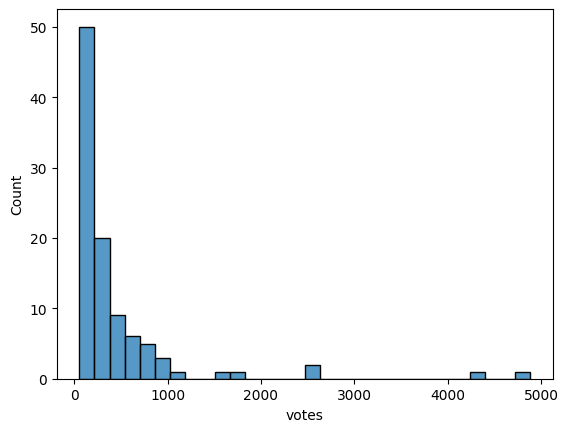

In [ ]:
#votes
sort=df.sort_values(by='votes',ascending=False).head(100)
sns.histplot(sort['votes'],bins=30)

<Axes: xlabel='online_order', ylabel='rate'>

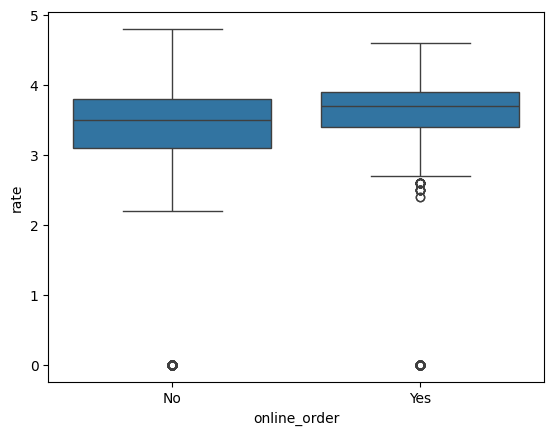

In [ ]:
'''4.2 Bivariate Analysis – Categorical vs Continuous (10 Points)
•	Boxplots:'''
# •	Rating vs Online Order
sns.boxplot(x='online_order',y='rate',data=df)


<Axes: xlabel='book_table', ylabel='rate'>

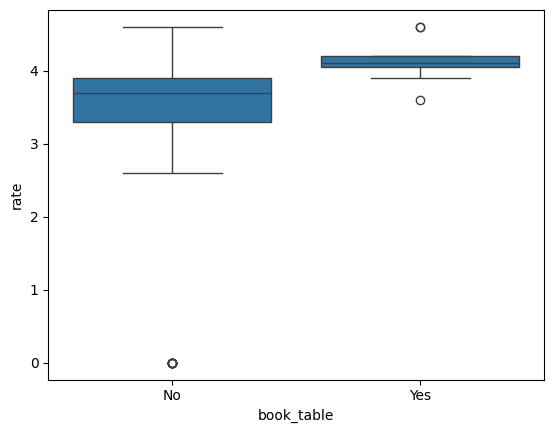

In [ ]:
# •	Rating vs Table Booking
sns.boxplot(y='rate',x='book_table',data=df)


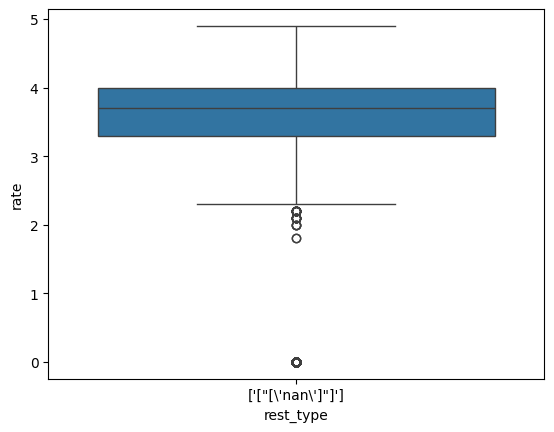

In [ ]:
from numpy import result_type
# •	Rating vs Restaurant Type
df['rest_type'] = df['rest_type'].astype(str)
df['rest_type'] = df['rest_type'].str.split(',')
df_rt = df.explode('rest_type')
df_rt['rest_type'] = df_rt['rest_type'].str.strip()

top_rest_types = df_rt['rest_type'].value_counts().head(10).index
df_rt = df_rt[df_rt['rest_type'].isin(top_rest_types)]
sns.boxplot(x='rest_type',y='rate',data=df_rt)
plt.show()

# •	Rating vs Top Locations

<Axes: xlabel='location', ylabel='rate'>

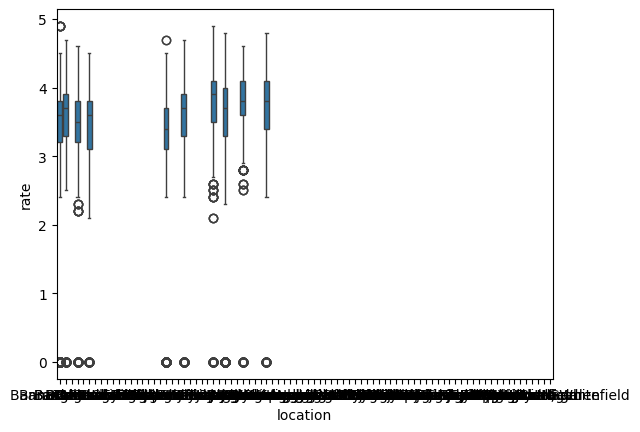

In [ ]:
# •	Rating vs Top Locations
top_locations = df['location'].value_counts().head(10).index
sns.boxplot(x='location', y='rate', data=df[df['location'].isin(top_locations)])

In [ ]:
''' 5. Missing Value & Outlier Analysis (10 Points)
•	Identification of missing values in:'''
# •	Rating
# •	Cuisines
# •	Restaurant type

df[['rate','cuisines','rest_type']].isnull().sum()


,0
rate,3945
cuisines,19
rest_type,0


<Axes: xlabel='approx_cost(for two people)'>

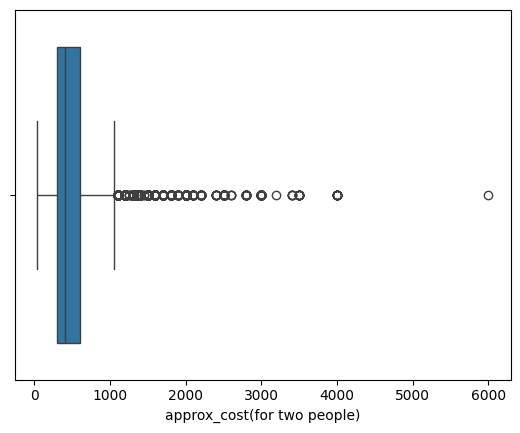

In [ ]:
''' •	Outlier detection in:'''
# •	Cost
sns.boxplot(x=df['approx_cost(for two people)'])


<Axes: xlabel='votes'>

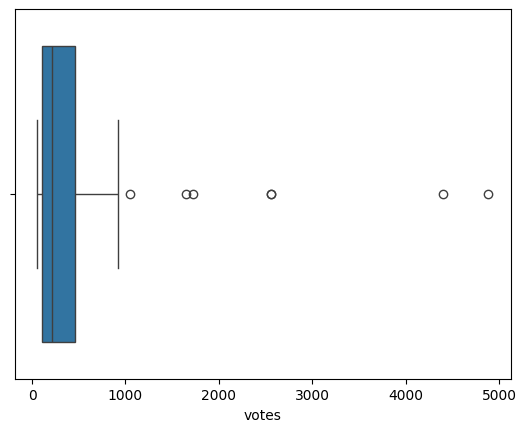

In [ ]:
# •	Votes
sort_votes=df.sort_values(by="votes",ascending=False).head(100)
sns.boxplot(x=sort_votes['votes'])